# Seizure Recognition Challenge
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}. 

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178 

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}: 

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open 

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed 

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area 

2 - They recorder the EEG from the area where the tumor was located 

1 - Recording of seizure activity 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Bidirectional, GRU, Conv1D, MaxPooling1D, Input, TimeDistributed
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0], axis = 1)
df.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [5]:
def plot_row(df, row_num):
    plot_data = df.iloc[row_num][:-1]
    plt.plot(plot_data)
    plt.show()
    print('This person is considered a class of: ' + str(df.iloc[row_num][-1]))

Have a crack on plotting different data by specifying which row. I indicated row number 4.

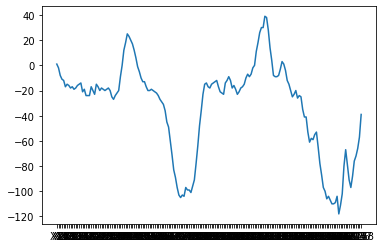

This person is considered a class of: 2


In [7]:
plot_row(df, 7)

## Preparing the Dataset
Let's have a look at the probability distribution of the classes. We will also start listing the hyperparameters and static variables here. We also shift y labels from 0-4 rather than 1-5 due to zero indexing.
### Hyperparameters

In [8]:
num_classes = 5
epochs = 5
batch_size = 100

### Transforming the output

In [9]:
y = df.pop('y')
y = y - 1
y = to_categorical(y, num_classes)

Seems to look pretty good. Let's keep pushing it.
### Splitting the dataset

In [10]:
x = np.float32(df.values)
scaler = MinMaxScaler(feature_range=(-1, 1))
x = scaler.fit_transform(x)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)
print('Size of the total datset: ' + str(x_train.shape))
print('Size of each input: ' + str(x_train[0].shape))

Size of the total datset: (8625, 178, 1)
Size of each input: (178, 1)


## Compiling and training the model
Chuck your model specification below

In [14]:
model = Sequential()

keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')
keras.layers.GRU(

NameError: name 'input_shape' is not defined

In [ ]:
callbacks = checkpoint = ModelCheckpoint('lstm_classifier.h5', monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(x_train, y_train, 
                          batch_size=batch_size, epochs=epochs, 
                          verbose=1, validation_split=0.2, 
                          callbacks = callbacks_list, shuffle=True)


## Plotting Loss and Accuracy

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()